This notebook contains some examples of signal processing with sounds.

Have a look at this lecture recording for some great sonic wonders around the world:
<br>
https://www.youtube.com/watch?v=WQhbT18_ZoM


Date Created: 13 Mar 2019
<br>
Last Modified: 19 Mar 2019
<br>
Humans Responsible: The Prickly Pythons

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 1.0 Reading in .wav files

In [3]:
from scipy.io import wavfile

In [4]:
fs, data = wavfile.read("test_data/violin_fs=16kHz.wav")

In [5]:
fs

16000

In [6]:
data

array([   0,    6,    7, ...,  298,  663, -665], dtype=int16)

In [7]:
data.shape

(65306,)

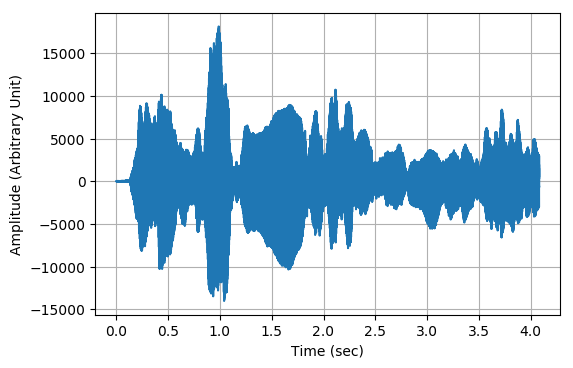

In [8]:
t = np.arange(0, len(data)) * (1/fs)

plt.plot(t, data)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.grid()
plt.show()

In [9]:
from IPython.display import Audio

In [10]:
Audio(data, rate=fs)

## Convert data to float64

In [11]:
data.dtype

dtype('int16')

In [12]:
signal_violin = data.astype(np.float64)

In [13]:
signal_violin.dtype

dtype('float64')

In [14]:
data

array([   0,    6,    7, ...,  298,  663, -665], dtype=int16)

In [15]:
signal_violin

array([   0.,    6.,    7., ...,  298.,  663., -665.])

# 2.0 Impulse Response
https://www.iks.rwth-aachen.de/en/research/tools-downloads/databases/aachen-impulse-response-database/

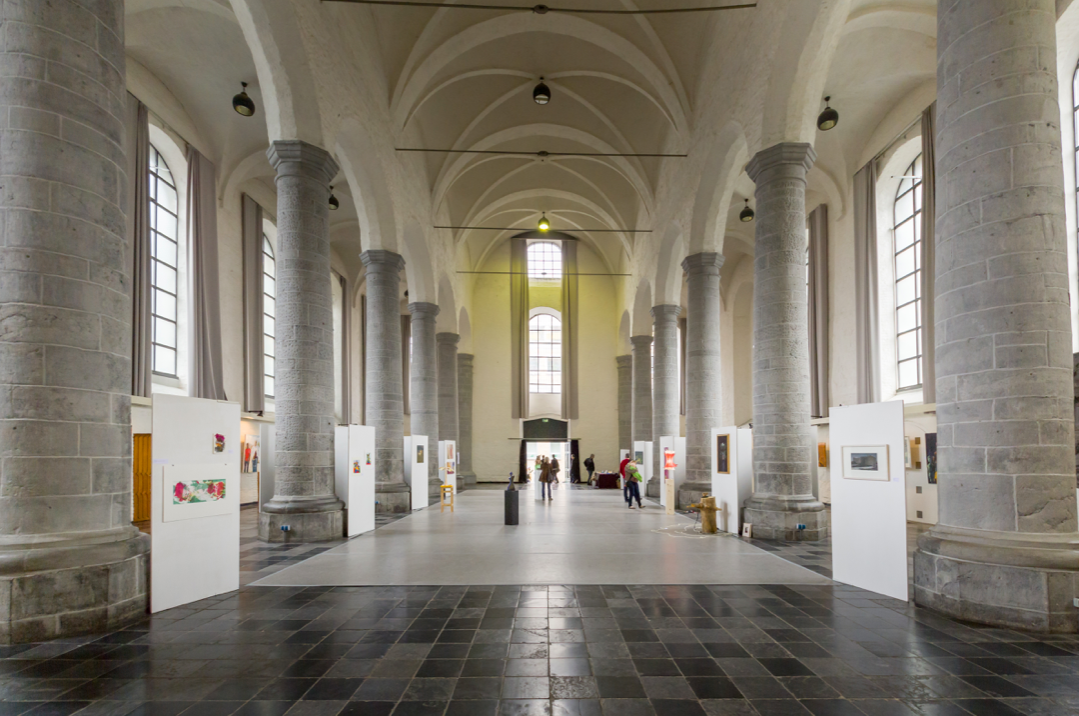

In [16]:
from IPython.display import Image

# The Aula Carolina hall in Aachen, Germany
Image(filename='images/Aula_Carolina.png', width=800) 

In [17]:
fs, data = wavfile.read("test_data/IR_ac_fs=16kHz.wav")

In [18]:
fs

16000

In [19]:
data

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [20]:
data.shape

(33333,)

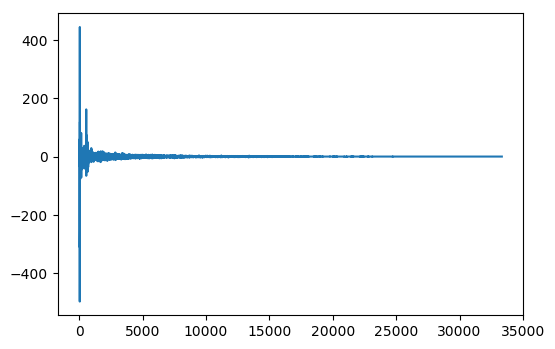

In [21]:
plt.plot(data)
plt.show()

In [22]:
Audio(data, rate=fs)

In [23]:
data.dtype

dtype('int16')

In [24]:
IR_AC = data.astype(np.float64)

# 3.0 Convolution

In [25]:
signal_violin_AC = np.convolve(signal_violin, IR_AC, 'full')

In [26]:
Audio(signal_violin, rate=fs)

In [27]:
Audio(signal_violin_AC, rate=fs)

## Bathroom
Data from:
<br>
https://www.iks.rwth-aachen.de/en/research/tools-downloads/databases/aachen-impulse-response-database/

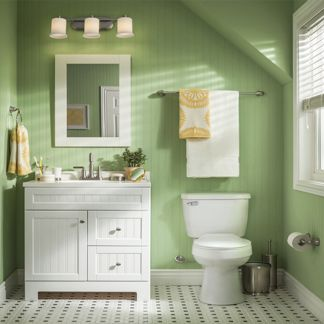

In [28]:
Image(filename='images/bathroom.jpeg', width=400)

In [29]:
fs, data = wavfile.read("test_data/IR_bathroom_fs=16kHz.wav")

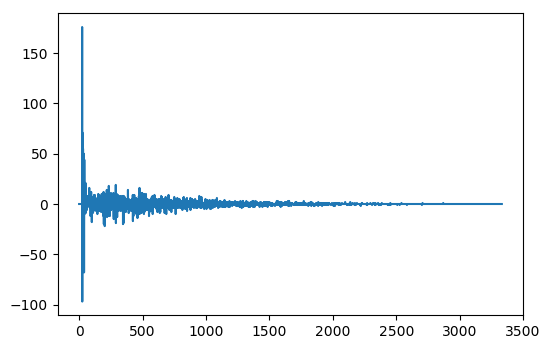

In [30]:
plt.plot(data)
plt.show()

In [31]:
IR_bathroom = data.astype(np.float64)

In [32]:
Audio(IR_bathroom, rate=fs)

In [33]:
signal_violin_bathroom = np.convolve(signal_violin, IR_bathroom, 'full')

In [34]:
Audio(signal_violin, rate=fs)

In [35]:
Audio(signal_violin_bathroom, rate=fs)

## Speech
Data from: http://www.ee.columbia.edu/~ronw/adst/lectures/matlab/wavs/airvib16.wav

In [36]:
fs, data = wavfile.read("test_data/airvib16.wav")

In [37]:
signal_speech = data.astype(np.float64)

In [38]:
signal_speech_bathroom = np.convolve(signal_speech, IR_bathroom, 'full')

In [39]:
signal_speech_AC = np.convolve(signal_speech, IR_AC, 'full')

In [40]:
Audio(signal_speech, rate=fs)

In [41]:
Audio(signal_speech_bathroom, rate=fs)

In [42]:
Audio(signal_speech_AC, rate=fs)

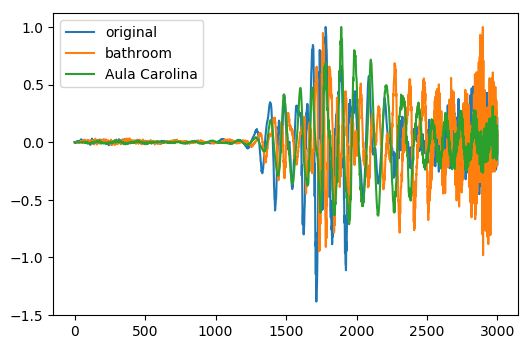

In [43]:
plt.plot(signal_speech[0:3000:1]/np.max(signal_speech[0:3000:1]), label='original')
plt.plot(signal_speech_bathroom[0:3000:1]/np.max(signal_speech_bathroom[0:3000:1]), label='bathroom')
plt.plot(signal_speech_AC[0:3000:1]/np.max(signal_speech_AC[0:3000:1]), label='Aula Carolina')
plt.legend()
plt.show()

## Black Holes
Data from: https://www.soundsofspacetime.org/gw170104.html

In [44]:
fs, data = wavfile.read("test_data/o1o2_modelstrain30hz_stereo_hleft_lright.wav")

In [45]:
fs

44100

In [46]:
data.shape

(469026,)

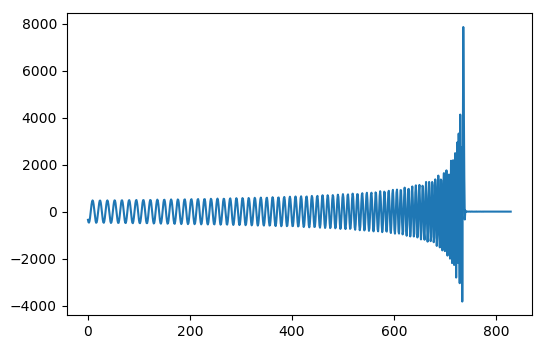

In [47]:
plt.plot(data[307026:390026:100])
plt.show()

In [48]:
signal_BH = data[307026:390026].astype(np.float64)

In [49]:
signal_BH_bathroom = np.convolve(signal_BH, IR_bathroom, 'full')

In [50]:
signal_BH_AC = np.convolve(signal_BH, IR_AC, 'full')

In [51]:
Audio(signal_BH, rate=fs)

In [52]:
Audio(signal_BH_bathroom, rate=fs)

In [53]:
Audio(signal_BH_AC, rate=fs)